In [ ]:
import torch
from torch import nn 
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor, Lambda, Compose
import matplotlib.pyplot as plt


In [ ]:
# load dataset from collection

training_data = datasets.FashionMNIST(
    root='data',
    train=True,
    download=True,
    transform=ToTensor(), #transforms image to tensor format

)

test_data = datasets.FashionMNIST(
    root='data',
    train=False,
    download=True,
    transform=ToTensor(), # transforms image to tensor format
)

In [ ]:
batch_size = 64

# loading data
train_dataloader = DataLoader(training_data, batch_size=batch_size)
test_dataloader = DataLoader(test_data, batch_size=batch_size)

for X, y in test_dataloader:
  print("Shape of [N, C, H, W]:", X.shape)
  print("Shape of y: ", y.shape, y.dtype)
  break

Shape of [N, C, H, W]: torch.Size([64, 1, 28, 28])
Shape of y:  torch.Size([64]) torch.int64


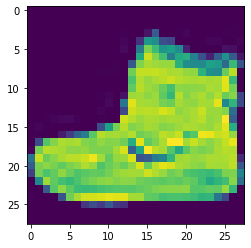

In [ ]:
# exaple to display how to visualise data sample 
# if it was not transformed into tensor

ex_data = datasets.FashionMNIST(
    root='data',
    train=True,
    download=True,
)

image, label = next(iter(ex_data))
plt.imshow(image)

In [ ]:
#checks if GPU is avaliable 
device = "cuda" if torch.cuda.is_available() else "cpu"
print("Using {} device".format(device))

# build a model
class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(28*28, 512),
            nn.ReLU(),
            nn.Linear(512,10),
            nn.ReLU()
    )
  
    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits

model = NeuralNetwork().to(device)
print(model)

Using cpu device
NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=10, bias=True)
    (3): ReLU()
  )
)


In [ ]:


# init loss function and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = t.optim.SGD(model.parameters(), lr=1e-3)

In [ ]:
# training 

def train(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    for batch, (X, y) in enumerate(dataloader):
        X, y = X.to(device), y.to(device)

        # Compute prediction error
        pred = model(X)
        loss = loss_fn(pred, y)

        # Backpropagation
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if batch % 100 == 0:
            loss, current = loss.item(), batch * len(X)
            print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")

In [ ]:
def test(dataloader, model, loss_fn):
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    model.eval()
    test_loss, correct = 0, 0
    with torch.no_grad():
        for X, y in dataloader:
            X, y = X.to(device), y.to(device)
            pred = model(X)
            test_loss += loss_fn(pred, y).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()
    test_loss /= num_batches
    correct /= size
    print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")

In [ ]:
# starts learning

epochs = 50
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    train(train_dataloader, model, loss_fn, optimizer)
    test(test_dataloader, model, loss_fn)
print("Done!")

Epoch 1
-------------------------------
loss: 0.373574  [    0/60000]
loss: 0.508659  [ 6400/60000]
loss: 0.305162  [12800/60000]
loss: 0.543587  [19200/60000]
loss: 0.459838  [25600/60000]
loss: 0.477935  [32000/60000]
loss: 0.478633  [38400/60000]
loss: 0.660202  [44800/60000]
loss: 0.652534  [51200/60000]
loss: 0.434490  [57600/60000]
Test Error: 
 Accuracy: 82.8%, Avg loss: 0.494062 

Epoch 2
-------------------------------
loss: 0.371067  [    0/60000]
loss: 0.506767  [ 6400/60000]
loss: 0.303851  [12800/60000]
loss: 0.541790  [19200/60000]
loss: 0.457567  [25600/60000]
loss: 0.476218  [32000/60000]
loss: 0.477140  [38400/60000]
loss: 0.659260  [44800/60000]
loss: 0.650899  [51200/60000]
loss: 0.432759  [57600/60000]
Test Error: 
 Accuracy: 82.8%, Avg loss: 0.492740 

Epoch 3
-------------------------------
loss: 0.368609  [    0/60000]
loss: 0.504909  [ 6400/60000]
loss: 0.302580  [12800/60000]
loss: 0.540060  [19200/60000]
loss: 0.455432  [25600/60000]
loss: 0.474559  [32000/600

In [ ]:
# save model
torch.save(model.state_dict(), "model.pth")
print("Saved PyTorch Model State to model.pth")

Saved PyTorch Model State to model.pth


In [ ]:
# load model
model = NeuralNetwork()
model.load_state_dict(torch.load("model.pth"))

<All keys matched successfully>

In [ ]:
# lets make predictions!
classes = [
    "T-shirt/top",
    "Trouser",
    "Pullover",
    "Dress",
    "Coat",
    "Sandal",
    "Shirt",
    "Sneaker",
    "Bag",
    "Ankle boot",
]

model.eval()
x, y = test_data[458][0], test_data[458][1] #first indexes - data samples
with torch.no_grad():
    pred = model(x)
    predicted, actual = classes[pred[0].argmax(0)], classes[y]
    print(f'Predicted: "{predicted}", Actual: "{actual}"')

Predicted: "T-shirt/top", Actual: "T-shirt/top"
